***Feedforward Neural Network***

Tutorial by Sentdex: https://www.youtube.com/watch?v=wQ8BIBpya2k

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.utils import normalize
from tensorflow.nn import relu, softmax
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


**Import dataset** (MNIST)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

input_dim = X_train.shape[1] # 784

**Display dataset** (MNIST)

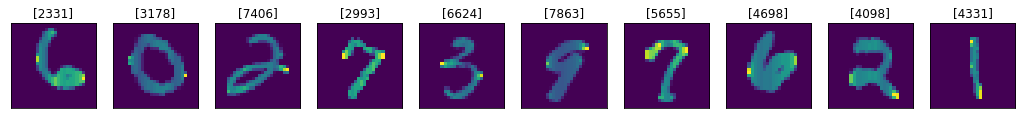

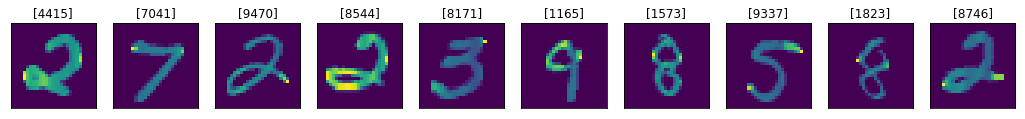

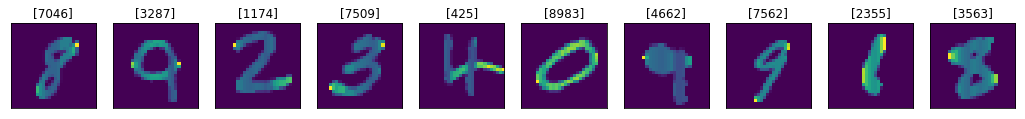

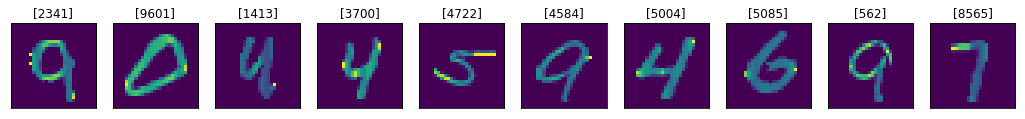

In [3]:
n = 10
seed = lambda k: int(99/(2*k+1)*13) # arbitrary mapping from k to some seed

# k rows of images
for k in range(4):
    np.random.seed(seed(k))
    plt.figure(figsize = (18, 4))
    for i in range(n):
        j = np.random.randint(0, len(X_test))
        ax = plt.subplot(1, n, i+1)
        ax.set_title(f"[{j}]")
        plt.imshow(X_test[j].reshape(28, 28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

**Build model**

In [4]:
model = Sequential()
model.add(Dense(128, activation = relu, input_shape = (input_dim,)))
model.add(Dense(128, activation = relu))
model.add(Dense(10, activation = softmax)) # Output

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


**Train model**

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"])

start_time = time.time()

epochs = 3

model.fit(
    X_train, y_train, 
    epochs = epochs,
    callbacks = [PlotLossesKeras()])

end_time = time.time() - start_time
print(f"Training time: {end_time} seconds for {epochs} epochs")
print(f"Training time: {end_time/epochs} per epoch on average")

In [ ]:
# Calculate validation loss and validation accuracy (Did the model overfit?)
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_acc}")

**Save model**

In [ ]:
model.save("Models/feedforward_mnist.model")

**Load model**

In [5]:
model = load_model("Models/feedforward_mnist.model")

**Display output**

In [6]:
predictions = model.predict([X_test])

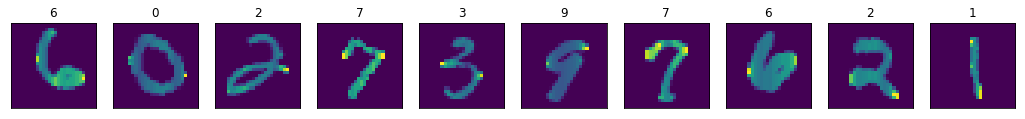

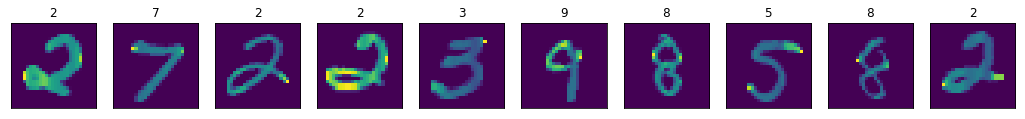

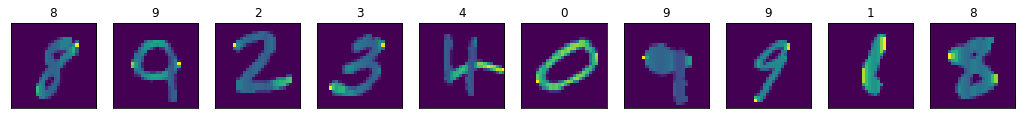

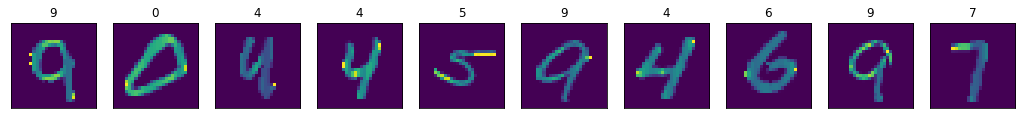

In [7]:
n = 10
seed = lambda k: int(99/(2*k+1)*13) # arbitrary mapping from k to some seed

# k rows of images
for k in range(4):
    np.random.seed(seed(k))
    plt.figure(figsize = (18, 4))
    for i in range(n):
        j = np.random.randint(0, len(X_test))
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X_test[j].reshape(28, 28))
        ax.set_title(np.argmax(predictions[j]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()